## <p style='text-align: center;'> Proyecto Selenium - Python </p>
## <p style='text-align: center;'> Análisis exploratorio - Compra/Venta tipo de cambio</p>

<table><tr>
<td> <img src=https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Selenium_logo.svg/1280px-Selenium_logo.svg.png alt="Drawing" style="width: 250px;"/> </td>
<td> <img src=https://geo-python-site.readthedocs.io/en/latest/_images/pandas_logo.png alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

### Intención del experimento:

- En este primer acercamiento con Selenium, se estudiará cómo se puede interactuar de manera dinámica con la información provista por un sitio web con los distintos tipos de cambio en relación ARS/USD. <br> A continuación, se mostrará cómo a través de la librería Selenium y Pandas se puede "escanear" de alguna manera, o, mejor dicho, realizar web-scraping, y al mismo tiempo manipular y analizar los resultados en forma de tabla.

### Metodología

- Se procederá a importar las librerías pertinentes para poder cumplir con el objetivo del experimento.


- Una vez importadas las librerías, se realiza el escaneo al sitio deseado, a través de una serie de comandos propios de selenium, que utilizan tanto XPATH, HTML como CSS.


- Una vez importada la información, se procede a la limpieza de datos, formatos, y creación de columnas auxiliares.


- Finalmente, se procede a realizar una representación gráfica de los resultados.


- Conclusiones

##### Primero, importamos las librerías que utilizaremos:

In [1]:
import pandas as pd
import numpy as np
from selenium import webdriver #Para ver version del chrome entrar en chrome://version
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import seaborn as sns
import matplotlib.pyplot as plt

##### Adicionalmente a importar las librerías, debemos descargar un 'Driver', [(link)](https://chromedriver.chromium.org/downloads) que nos permitirá realizar las interacciones de selenium con los distintos elementos de los sitios. <br> <br>   Luego, hacemos la conexión con el driver guardado en el disco C y entramos al sitio con la fuente de información. En este caso, se trata de un sitio que muestra los distintos tipos de cambio por provincia.

In [2]:
driver = webdriver.Chrome('C:\SeleniumDriver\chromedriver.exe')
driver.get('https://www.infodolar.com/cotizacion-dolar-blue.aspx')

##### Es normal que tengamos que lidiar con anuncios o con 'pop ups' de subscripción. <br> <br>Para ello, encontramos el botón de cerrar a través del CSS_Selector. Le damos 20 segundos para que encuentre el botón. De lo contrario, el código generará error.

In [ ]:
WebDriverWait(driver,20).until(
    EC.element_to_be_clickable(
        (By.CSS_SELECTOR,'div.p-close')
    )
).click()

##### Procedemos a guardar la información de la tabla de cotizaciones en distintos diccionarios. <br><br> Luego, consolidamos toda la información para poder convertirla en un Dataframe (en adelante 'df')

In [3]:
#//table[@id = "cotizacionesBlueProvincias"]/tbody/tr/td/a

Provincias = driver.find_elements_by_xpath('//*[@id="cotizacionesBlueProvincias"]/tbody/tr/td/a')

Compra = driver.find_elements_by_xpath('//*[@id="cotizacionesBlueProvincias"]/tbody/tr/td[2]')

Venta = driver.find_elements_by_xpath('//*[@id="cotizacionesBlueProvincias"]/tbody/tr/td[3]')

Resultados = []

for i in range(len(Provincias)):
    TempData = {'Provincias': Provincias[i].text,
                'Compra': Compra[i].text,
                'Venta': Venta[i].text}
    Resultados.append(TempData)

##### Creamos el df

In [4]:
df = pd.DataFrame(Resultados)

df

,Provincias,Compra,Venta
0,Buenos Aires,"$ 199,00\n-$ 2,00","$ 205,00\n-$ 2,00"
1,Capital Federal,"$ 198,00\n-$ 2,00","$ 202,00\n-$ 2,00"
2,Catamarca,"$ 198,00\n-$ 2,00","$ 204,00\n-$ 2,00"
3,Chaco,"$ 198,00\n-$ 2,00","$ 202,00\n-$ 2,00"
4,Chubut,"$ 198,00\n-$ 2,00","$ 204,00\n-$ 2,00"
5,Córdoba,"$ 199,00\n-$ 2,00","$ 205,00\n-$ 2,00"
6,Corrientes,"$ 198,00\n-$ 2,00","$ 202,00\n-$ 2,00"
7,Entre Ríos,"$ 198,00\n-$ 2,00","$ 204,00\n-$ 2,00"
8,Formosa,"$ 198,00\n-$ 2,00","$ 202,00\n-$ 2,00"
9,Jujuy,"$ 198,00\n-$ 2,00","$ 204,00\n-$ 2,00"


##### Como puede apreciarse, la información es correcta. Sin embargo, el formato no es el que estamos buscando, con lo cual sólo nos quedaremos con los 3 primeros carácteres de los números y cambiamos los nombres de las columnas.

In [5]:
#Limpiamos las columnas


df['Valor Compra'] = df['Compra'].str[2:5]

df['Valor Venta'] = df['Venta'].str[2:5]

df = df.drop(columns = ['Compra','Venta'])

df

,Provincias,Valor Compra,Valor Venta
0,Buenos Aires,199,205
1,Capital Federal,198,202
2,Catamarca,198,204
3,Chaco,198,202
4,Chubut,198,204
5,Córdoba,199,205
6,Corrientes,198,202
7,Entre Ríos,198,204
8,Formosa,198,202
9,Jujuy,198,204


##### Para poder realizar operaciones con estos números, primero debemos cambiarlos a tipo 'float' para poder realizar operacines con los mismos.<br><br> Vemos con el comando info() cómo cambiaron los tipos de 'string' a 'float'.

In [6]:
#Convierto a los tipo objeto a float
df['Valor Compra'] = df['Valor Compra'].astype('float')

df['Valor Venta'] = df['Valor Venta'].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Provincias    24 non-null     object 
 1   Valor Compra  24 non-null     float64
 2   Valor Venta   24 non-null     float64
dtypes: float64(2), object(1)
memory usage: 704.0+ bytes


##### Creamos nuevas columnas auxiliares, mostrando el gap entre compra venta en terminos nominales y la respectiva variación % entre ambos por provincia en la fecha de extracción.

In [7]:
df['Variación'] = df['Valor Venta'] - df['Valor Compra']

df['Tipo Conversión'] = 'USD/ARS'

df['Variación % Compra/Venta'] = round(((df['Valor Venta']/df['Valor Compra']) - 1) * 100, 2)

df['Fecha'] = pd.to_datetime('today').date()

df = df.sort_values(['Variación % Compra/Venta','Provincias'], ascending = 'False')

df

,Provincias,Valor Compra,Valor Venta,Variación,Tipo Conversión,Variación % Compra/Venta,Fecha
1,Capital Federal,198.0,202.0,4.0,USD/ARS,2.02,2022-05-04
3,Chaco,198.0,202.0,4.0,USD/ARS,2.02,2022-05-04
6,Corrientes,198.0,202.0,4.0,USD/ARS,2.02,2022-05-04
8,Formosa,198.0,202.0,4.0,USD/ARS,2.02,2022-05-04
13,Misiones,198.0,202.0,4.0,USD/ARS,2.02,2022-05-04
21,Santiago del Estero,198.0,202.0,4.0,USD/ARS,2.02,2022-05-04
12,Mendoza,198.0,203.0,5.0,USD/ARS,2.53,2022-05-04
0,Buenos Aires,199.0,205.0,6.0,USD/ARS,3.02,2022-05-04
5,Córdoba,199.0,205.0,6.0,USD/ARS,3.02,2022-05-04
20,Santa Fe,199.0,205.0,6.0,USD/ARS,3.02,2022-05-04


##### Vemos un primer acercamiento de las estadísticas del df

In [8]:
df.describe()

,Valor Compra,Valor Venta,Variación,Variación % Compra/Venta
count,24.000000,24.000000,24.000000,24.000000
mean,198.125000,203.791667,5.666667,2.860833
std,0.337832,1.250362,1.167184,0.589192
min,198.000000,202.000000,4.000000,2.020000
25%,198.000000,202.750000,4.750000,2.402500
50%,198.000000,204.000000,6.000000,3.030000
75%,198.000000,204.250000,6.000000,3.030000
max,199.000000,206.000000,8.000000,4.040000


##### En base a los resultados expuestos, clasificaremos a las provincias en 3 grupos distintos:

|Categoría||Variación %|
|-------||------------|
|<font color=6c4675>**A**</font>||Variación de 0 a 2%|
|<font color=Green>**B**</font>||Variación de 2% a 3%|
|<font color=Red>**C**</font>||Variación de 3% o más|

##### Creamos las condiciones en base al cuadro expuesto en la celda anterior utilizando numpy

In [11]:
#Creamos categorías en base a las variaciones

Condiciones = [
    (df['Variación % Compra/Venta'] <= 2.99)
    ,(df['Variación % Compra/Venta'] <= 3.99)
    ,(df['Variación % Compra/Venta'] >= 3.99)
]

Valores = ['A','B','C']

df['Categoría'] = np.select(Condiciones,Valores)

df

,Provincias,Valor Compra,Valor Venta,Variación,Tipo Conversión,Variación % Compra/Venta,Fecha,Categoría
1,Capital Federal,198.0,202.0,4.0,USD/ARS,2.02,2022-05-04,A
3,Chaco,198.0,202.0,4.0,USD/ARS,2.02,2022-05-04,A
6,Corrientes,198.0,202.0,4.0,USD/ARS,2.02,2022-05-04,A
8,Formosa,198.0,202.0,4.0,USD/ARS,2.02,2022-05-04,A
13,Misiones,198.0,202.0,4.0,USD/ARS,2.02,2022-05-04,A
21,Santiago del Estero,198.0,202.0,4.0,USD/ARS,2.02,2022-05-04,A
12,Mendoza,198.0,203.0,5.0,USD/ARS,2.53,2022-05-04,A
0,Buenos Aires,199.0,205.0,6.0,USD/ARS,3.02,2022-05-04,B
5,Córdoba,199.0,205.0,6.0,USD/ARS,3.02,2022-05-04,B
20,Santa Fe,199.0,205.0,6.0,USD/ARS,3.02,2022-05-04,B


##### Creamos el gráfico a través de la librería seaborn, por provincia y por categoría para ver los distintos gaps % entre compra y venta.

<Figure size 720x576 with 0 Axes>

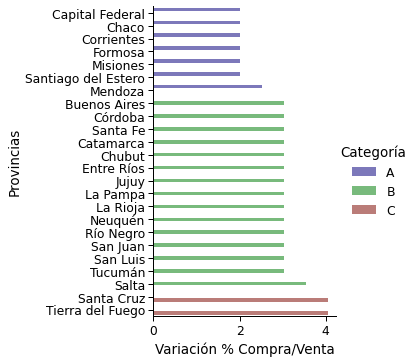

In [28]:
plt.figure(figsize = (10,8))
sns.set_context('paper', font_scale = 1.4)
palette = sns.color_palette("hls", 3)
palette.reverse()

sns.catplot(x='Variación % Compra/Venta'
            ,y='Provincias'
            ,hue='Categoría'
            ,saturation=.5
            ,kind= 'bar'
            ,data= df
            ,palette= palette ).set(xlabel='Variación % Compra/Venta', ylabel='Provincias')


##### Una vez hecho el análisis y el gráfico, cerramos el driver para cerrar la ventana de donde se extrajo la información.

In [29]:
#Cerramos la página
driver.quit()

## Conclusiones

- Para el día de la fecha de extracción 04/05/2022:
  - Las provincias con mayor variación fueron Santa Cruz y Tierra del fuego
    
  - Las provincias con menor variación fueron Capital Federal, Chaco, Corrientes, Formosa, Misiones y Santiago del Estero.
        
  - La variación % promedio fue del 2.86 entre compra y venta de USD.

##### Si les gustó este simple experimento, pueden probar replicarlo para cualquier sitio en el que quieran bucear y recavar datos! <br><br> Espero les haya sido útil y escucho feedbacks.... MUCHAS GRACIAS POR SU ATENCIÓN 😁